In [1]:
! pip install dionysus

     |████████████████████████████████| 1.7MB 7.1MB/s 
  Created wheel for dionysus: filename=dionysus-2.0.8-cp36-cp36m-linux_x86_64.whl size=322802 sha256=0db2f3c99123a3a86d994c9230ec10030df2f1fa0a6b18ea1100c54db676e595
  Stored in directory: /root/.cache/pip/wheels/91/a9/4e/dcf72861c267c8445765197025f7a02f887fc8f6b43c9c710c
Successfully built dionysus


In [2]:
import cv2 as cv

In [3]:
import dionysus as ds
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from skimage.morphology import skeletonize
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [4]:
mnist = keras.datasets.mnist
(train, digit_train), (test, digit_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [5]:
data_X = np.concatenate((train,test))
data_y = np.concatenate((digit_train,digit_test))

In [6]:
class graph:

  def __init__(self, vertices = [] , edges = [], visited = [], bfs = []):
    self.v = vertices
    self.e = edges
    self.visit = visited
    self.bfs = bfs

  def set_visits(self):
    self.visit = []
    self.bfs = []
    for i in range(len(self.v)):
        self.visit.append(0)
        self.bfs.append(0)

  def adjacency(self):
    for i in range(len(self.v)):
      print("Vertex ", self.v[i] ," is connected to:")
      print(self.e[i])
  
  def add_vertex(self, v):
    self.v.append(v)
    self.e.append([])
    self.visit.append(0)
  
  def set_edges(self):
    for i in range(len(self.v)):
      self.e.append([])

  def add_edge(self, e):
    e1 = e[0]
    e2 = e[1]
    for i in range(len(self.v)):
      if self.v[i] == e2:
        self.e[i].append(e1)
    for i in range(len(self.v)):
      if self.v[i] == e1:
        self.e[i].append(e2)

  def if_edge(self, e):
    e1 = e[0]
    e2 = e[1]
    k = -1
    for i in range(len(self.v)):
      if self.v[i] == e1:
        break
    return e2 in self.e[i]

  def get_index(self , v):
    for i in range(len(self.v)):
      if self.v[i] == v:
        break
    return i
  
  def get_row(self , v):
    for i in range(len(self.v)):
      if self.v[i] == v:
        break
    row = []
    for j in range(len(self.v)):
      edge = self.v[j] in self.e[i]
      row.append(edge*1)
    return row

  def adjacency_matrix(self):
    adjacency_matrix = []
    for i in range(len(self.v)):
      adjacency_matrix.append(self.get_row(self.v[i]))
    return adjacency_matrix
  
  def update_visit(self , w):
    i = self.get_index(w)
    self.visit[i] = 1
  
  def get_visit(self,w):
    i = self.get_index(w)
    return self.visit[i]
  
  def update_bfs(self, w, t):
    i = self.get_index(w)
    self.bfs[i] = t

  def visit_left(self):
    return 0 in self.visit

  def bfs_val(self):
    return(max(self.bfs))

In [7]:
def get_edges(graph, ord = False, v = 0):
  get_edges = []
  if ord == False:
    vertices = graph.v
    edges = graph.e
    for i in range(len(vertices)):
      vertex = vertices[i]
      while edges[i] != []:
        get_edges.append([vertex, edges[i][0]])
        edges[graph.get_index(edges[i][0])].remove(vertex)
        edges[i].pop(0)
    return get_edges
  if ord:
    vertices = graph.v
    order = graph.bfs_order(v)
    order_edge = []
    edges = graph.e
    for i in range(len(vertices)):
      vertex = vertices[i]
      while edges[i] != []:
        get_edges.append([vertex, edges[i][0]])
        order
        edges[graph.get_index(edges[i][0])].remove(vertex)
        edges[i].pop(0)
    return (get_edges,order_edge)


In [8]:
def get_graph(vertices , edges):
  sample = graph(vertices)
  sample.set_edges()
  for i in edges:
    sample.add_edge(i)
  return sample

In [9]:
def bfs_order(graph, v):
  time = 1
  graph.set_visits()
  graph.update_bfs(v, time)
  graph.update_visit(v)
  temp = graph.e[graph.get_index(v)]
  while graph.visit_left():
    time = time + 1
    temp2 = []
    for t in temp:
      if graph.get_visit(t) == 0:
        graph.update_bfs(t,time)
        graph.update_visit(t)
        temp2 = temp2 + graph.e[graph.get_index(t)]
    if temp == []:
      temp2.append((graph.visit).index(0))
    temp = temp2

In [10]:
def bfs_simplex_0(graph, v):
  s_0 = []
  graph.set_visits()
  bfs_order(graph, v)
  for i in graph.v:
    s_0.append(([i], graph.bfs[graph.get_index(i)]))
  return s_0   

In [11]:
def bfs_simplex_1(graph, v):
  s_1 = []
  graph.set_visits()
  bfs_order(graph, v)
  for i in get_edges(graph):
    t = max(graph.bfs[graph.get_index(i[0])],graph.bfs[graph.get_index(i[1])])
    s_1.append((i,t))
  return s_1

In [12]:
def get_skeleton(image):
    binary_image = image.astype(bool)
    skeleton = skeletonize(binary_image)
    skeleton = skeleton.astype(int)
    return skeleton

In [13]:
def points(vertices):
  point = []
  [v0,v1] = vertices
  for i in range(np.shape(v0)[0]):
    point.append([v0[i],v1[i]])
  return list(point)

In [14]:
def skeleton_points(image):
  sk = get_skeleton(image)
  vert_1 = np.where(sk == 1)
  return points(vert_1)

In [15]:
def get_up_nghbrs(vertex, allpt):
  [x,y] = allpt[vertex]
  neighbours = [[x,y+1], [x+1,y], [x+1,y+1], [x+1, y-1]]
  ngbhr_vertices = []
  for i in neighbours:
    if i in allpt:
      ngbhr_vertices.append([vertex,allpt.index(i)])
  return ngbhr_vertices

In [16]:
def get_up_nghbrs_nd(vertex, allpt):
  [x,y] = allpt[vertex]
  neighbours = [[x,y+1], [x+1,y]]
  ngbhr_vertices = []
  for i in neighbours:
    if i in allpt:
      ngbhr_vertices.append([vertex,allpt.index(i)])
  return ngbhr_vertices

In [17]:
def graph_sk_edge(allpt):
  v = np.arange(np.shape(allpt)[0])
  e = []
  for i in v:
    e = e + get_up_nghbrs(i,allpt)
  return e

In [18]:
def graph_sk_edge_r3c(allpt):
  v = np.arange(np.shape(allpt)[0])
  e = []
  for i in v:
    e = e + get_up_nghbrs_nd(i,allpt)
  return e

In [19]:
def skeletongraph(image, show = -1):
  allpt = skeleton_points(image)
  v = np.arange(np.shape(allpt)[0])
  e = graph_sk_edge(allpt)
  if show == -1:
    g = graph(v,[])
    g.set_edges()
    for i in e:
      g.add_edge(i)
    return g
  if show == 1:
    g = nx.Graph()
    g.add_nodes_from(v)
    g.add_edges_from(e)
    return g

In [20]:
def add_edges_diag_r3c(g, allpt):
  for i in g.v:
    [x,y] = allpt[i]
    neighbours = [[x+1,y+1], [x+1, y-1]]
    for j in neighbours:
      if j in allpt:
        k = allpt.index(j)
        edges_k = g.e[k]
        edges_i = g.e[i]
        intersection = list(set(edges_k) & set(edges_i))
        if intersection == []:
          g.add_edge([i,k])
  return g

In [21]:
def skeletongraphr3c(image, show = -1):
  allpt = skeleton_points(image)
  v = np.arange(np.shape(allpt)[0])
  e = graph_sk_edge_r3c(allpt)
  g = graph(v,[])
  g.set_edges()
  for i in e:
    g.add_edge(i)
  g_n = add_edges_diag_r3c(g,allpt)
  if show == -1:
    return g_n
  if show == 1:
    g_r = nx.Graph()
    g_r.add_nodes_from(v)
    g_r.add_edges_from(get_edges(g_n))
    return g_r

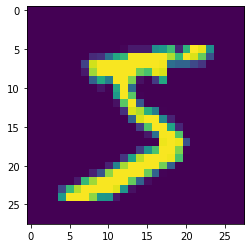

In [22]:
image = data_X[0]
plt.imshow(image)
g_0 = skeletongraph(image, 1)
g_1 = skeletongraph(image , -1)
g_3 = skeletongraphr3c(image, 1)
g_4 = skeletongraphr3c(image, -1)

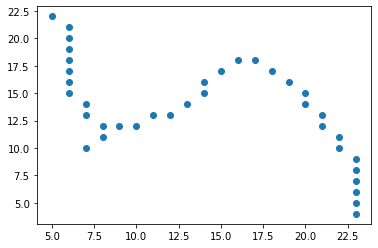

In [23]:
#Skeletonising
sk = get_skeleton(image)
vo,v1 = np.where(sk== 1)
plt.scatter(vo,v1)

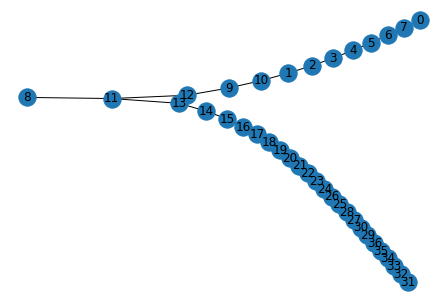

In [24]:
#Shows graph with labelling of vertices
nx.draw_kamada_kawai(g_0, with_labels=True)

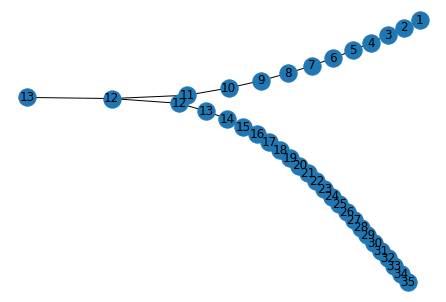

In [25]:
#Shows graph with bfs stream labelling of vertices without excluding cycles of length 3
bfs_simplex_0(g_1,0)
labels={i:g_1.bfs[i] for i in range(0, np.shape(g_1.bfs)[0])}
nx.draw_kamada_kawai(g_0,labels = labels, with_labels=True)

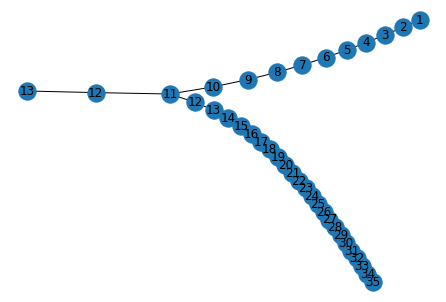

In [26]:
#Shows graph with bfs stream labelling of vertices excluding cycles of length 3
bfs_simplex_0(g_4,0)
labels={i:g_4.bfs[i] for i in range(0, np.shape(g_4.bfs)[0])}
nx.draw_kamada_kawai(g_3,labels = labels, with_labels=True)

In [27]:
sim_0 = bfs_simplex_0(skeletongraphr3c(image, -1),0)
sim_1 = bfs_simplex_1(skeletongraphr3c(image, -1),0)
sim = sim_0 + sim_1
print(sim)

[([0], 1), ([1], 8), ([2], 7), ([3], 6), ([4], 5), ([5], 4), ([6], 3), ([7], 2), ([8], 13), ([9], 10), ([10], 9), ([11], 12), ([12], 11), ([13], 12), ([14], 13), ([15], 14), ([16], 15), ([17], 16), ([18], 17), ([19], 18), ([20], 19), ([21], 20), ([22], 21), ([23], 22), ([24], 23), ([25], 25), ([26], 24), ([27], 27), ([28], 26), ([29], 29), ([30], 28), ([31], 35), ([32], 34), ([33], 33), ([34], 32), ([35], 31), ([36], 30), ([0, 7], 2), ([1, 2], 8), ([1, 10], 9), ([2, 3], 7), ([3, 4], 6), ([4, 5], 5), ([5, 6], 4), ([6, 7], 3), ([8, 11], 13), ([9, 10], 10), ([9, 12], 11), ([11, 12], 12), ([12, 13], 12), ([13, 14], 13), ([14, 15], 14), ([15, 16], 15), ([16, 17], 16), ([17, 18], 17), ([18, 19], 18), ([19, 20], 19), ([20, 21], 20), ([21, 22], 21), ([22, 23], 22), ([23, 24], 23), ([24, 26], 24), ([25, 26], 25), ([25, 28], 26), ([27, 28], 27), ([27, 30], 28), ([29, 30], 29), ([29, 36], 30), ([31, 32], 35), ([32, 33], 34), ([33, 34], 33), ([34, 35], 32), ([35, 36], 31)]


In [28]:
f = ds.Filtration()
for vertices, time in sim:
  f.append(ds.Simplex(vertices, time))

In [29]:
f.sort()
m = ds.homology_persistence(f)

In [30]:
#Prints Persistence Diagram
diagrams = ds.init_diagrams(m,f)
print(diagrams)
for i,dgms in enumerate(diagrams):
  for pt in dgms:
    print(i , pt.birth, pt.death)

[Diagram with 1 points, Diagram with 0 points]
0 1.0 inf


In [ ]:
#Prints simplex stream
for s in f:
  print(s)

In [32]:
data_dim_0 = []
data_dim_1 = []
sk = get_skeleton(image)
#cutoff value is total number of vertices in the graph
cutoff = float(np.shape(np.where(sk==1))[1])
for i,dgms in enumerate(diagrams):
  for pt in dgms:
    if i == 0:
      if pt.death == float('inf'):
        data_dim_0.append([pt.birth, cutoff])
      else:
        data_dim_0.append([pt.birth, pt.death])
    if i == 1:
      if pt.death == float('inf'):
        data_dim_1.append([pt.birth, cutoff])
      else:
        data_dim_1.append([pt.birth, pt.death])

In [33]:
def length_summary_1(diag):
  lengths = []
  if diag == []:
    return (0,0,0)
  for i in diag:
   lengths.append(i[1] - i[0])
  return (min(lengths),max(lengths), sum(lengths)/len(lengths))

In [34]:
def length_summary_2(diag):
  lengths = []
  if diag == []:
    return (0,0,0)
  for i in diag:
   lengths.append(i[0]*(i[1] - i[0]))
  return (min(lengths),max(lengths), sum(lengths)/len(lengths))

In [35]:
def length_summary_3(diag):
  a = 0
  b = 0
  c = 0
  d = 0
  lengths = []
  if diag == []:
    return (0,0,0)
  for i in diag:
    a = a + i[0]*(i[1] - i[0])
    b = b + (i[0]**2)*(i[1] - i[0])**4
    lengths.append(i[1] - i[0])
  return (a, b, sum(lengths)/len(lengths))

In [36]:
def length_summary(image, cases = 0):
  sim_0 = bfs_simplex_0(skeletongraphr3c(image, -1),0)
  sim_1 = bfs_simplex_1(skeletongraphr3c(image, -1),0)
  sim = sim_0 + sim_1
  f = ds.Filtration()
  for vertices, time in sim:
    f.append(ds.Simplex(vertices, time))
  f.sort()
  m = ds.homology_persistence(f)
  diagrams = ds.init_diagrams(m,f)
  data_dim_0 = []
  data_dim_1 = []
  sk = get_skeleton(image)
  #cutoff value is total number of vertices in the graph
  cutoff = float(np.shape(np.where(sk==1))[1])
  for i,dgms in enumerate(diagrams):
    for pt in dgms:
      if i == 0:
        if pt.death == float('inf'):
          data_dim_0.append([pt.birth, cutoff])
        else:
          data_dim_0.append([pt.birth, pt.death])
      if i == 1:
        if pt.death == float('inf'):
          data_dim_1.append([pt.birth, cutoff])
        else:
          data_dim_1.append([pt.birth, pt.death])
  return length_summary_1(data_dim_0) + length_summary_1(data_dim_1)

In [37]:
M = np.float32([[1,0,6],[0,1,3]])
data_1 = np.zeros((70000,6))
for i in range(0,70000):
  img =  cv.warpAffine(data_X[i], M, (28,28))
  data_1[i,:] = length_summary(img)

In [38]:
data_2 = np.zeros((70000,6))
for i in range(0,70000):
  img = np.rot90(cv.warpAffine(data_X[i], M, (28,28)))
  data_2[i,:] = length_summary(img)

In [39]:
data_3 = np.zeros((70000,6))
for i in range(0,70000):
  img = np.rot90(np.rot90(cv.warpAffine(data_X[i], M, (28,28))))
  data_3[i,:] = length_summary(img)

In [40]:
data_4 = np.zeros((70000,6))
for i in range(0,70000):
  img = np.rot90(np.rot90(np.rot90(cv.warpAffine(data_X[i], M, (28,28)))))
  data_4[i,:] = length_summary(img)

In [41]:
tran_data = np.concatenate((data_1,data_2,data_3,data_4), axis = 1)

In [45]:
test_data_2 = tran_data[60000:,:]

In [46]:
data_1 = np.zeros((70000,6))
for i in range(0,70000):
  img =  data_X[i]
  data_1[i,:] = length_summary(img)

In [47]:
data_2 = np.zeros((70000,6))
for i in range(0,70000):
  img = np.rot90(data_X[i])
  data_2[i,:] = length_summary(img)

In [48]:
data_3 = np.zeros((70000,6))
for i in range(0,70000):
  img = np.rot90(np.rot90(data_X[i]))
  data_3[i,:] = length_summary(img)

In [49]:
data_4 = np.zeros((70000,6))
for i in range(0,70000):
  img = np.rot90(np.rot90(np.rot90(data_X[i])))
  data_4[i,:] = length_summary(img)

In [ ]:
total_data = np.concatenate((data_1,data_2,data_3,data_4), axis = 1)
pd.DataFrame(total_data).to_csv('total_data.csv')
! zip total_data_bfs.zip total_data.csv 
! mv 'total_data_bfs.zip' "/content/drive/My Drive"

In [58]:
train_data = total_data[:60000,:]
test_data_1 = total_data[60000:,:]

In [ ]:
! unzip "/content/drive/My Drive/tran_data.zip"

In [63]:
test_data_2 = np.array(pd.read_csv('tran_data.csv'))[60000:,1:]

In [67]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

In [69]:
classifier = RandomForestClassifier(n_estimators = 1000, random_state = 31415)
classifier.fit(train_data, digit_train)
#test_pred = classifier.predict(test_data)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=31415,
                       verbose=0, warm_start=False)

In [76]:
test_pred = classifier.predict(test_data_1)

In [77]:
diff = pd.DataFrame(test_pred - digit_test , columns = ['values'])
mismatch = diff[diff['values']!= 0]

In [78]:
print('Accuracy of model is', 100 - np.shape(mismatch)[0]*100/10000)

Accuracy of model is 64.09


In [ ]:
#testing functions
sample = graph([1,2,3],[[2,3],[1],[1]])
sample.adjacency()
sample.add_vertex(4)
sample.adjacency()
sample.add_edge([3,4])
sample.adjacency()
sample.set_visits()
sample.visit
sample.if_edge([4,2])
sample.get_row(1)
sample.adjacency_matrix()